# Import

https://drive.google.com/file/d/1fTYTaJGaSNYrc1n1igjAMWlN7ntZdlNi/view

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from math import pi
from numpy import mean

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report


In [ ]:
!git clone https://github.com/jasonhuang16/cmpt-459-project-milestone2.git

Cloning into 'cmpt-459-project-milestone2'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 7 (delta 1), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
%cd ./cmpt-459-project-milestone2/dataset
!ls

/content/cmpt-459-project-milestone2/dataset
cases_2021_test_processed_unlabelled_2.csv   cases_2021_train_processed_2.csv
cases_2021_test_processed_unlabelled_2.xlsx  cases_2021_train_processed_2.xlsx


In [ ]:
cases_train = pd.read_csv("cases_2021_train_processed_2.csv")
cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,chronic_disease_binary,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,outcome_group
0,18,female,Bihar,India,25.49096,85.93903,2020-05-18,False,265527,1576,262371,1580,212.762145,0.593537,hospitalized
1,27,female,NaN,Philippines,7.07000,125.60000,2020-04-15,False,747288,13297,603746,130245,681.949809,1.779368,nonhospitalized
2,46,male,Tamil Nadu,India,13.08362,80.28252,2020-05-02,False,886673,12719,858075,15879,1139.078325,1.434463,hospitalized
3,21,female,Tamil Nadu,India,13.08362,80.28252,2020-05-24,False,886673,12719,858075,15879,1139.078325,1.434463,hospitalized
4,27,male,Bihar,India,26.28361,87.20347,2020-05-27,False,265527,1576,262371,1580,212.762145,0.593537,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17207,29,female,Tamil Nadu,India,13.08362,80.28252,2020-04-24,False,886673,12719,858075,15879,1139.078325,1.434463,hospitalized
17208,47,female,NaN,Philippines,16.68814,121.54992,2020-04-09,False,747288,13297,603746,130245,681.949809,1.779368,nonhospitalized
17209,30,male,Bihar,India,24.94452,86.26404,2020-05-26,False,265527,1576,262371,1580,212.762145,0.593537,hospitalized
17210,59,male,Tamil Nadu,India,12.68224,79.98008,2020-05-31,False,886673,12719,858075,15879,1139.078325,1.434463,hospitalized


In [ ]:
cases_test = pd.read_csv("cases_2021_test_processed_unlabelled_2.csv")
cases_test

,age,sex,province,country,latitude,longitude,date_confirmation,chronic_disease_binary,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,59,female,NaN,Philippines,14.595800,120.97720,2020-03-31,False,747288,13297,603746,130245,681.949809,1.779368
1,79,male,Tamil Nadu,India,11.139270,79.08428,2020-05-24,False,886673,12719,858075,15879,1139.078325,1.434463
2,44,female,Tamil Nadu,India,13.083620,80.28252,2020-05-19,False,886673,12719,858075,15879,1139.078325,1.434463
3,36,male,Tamil Nadu,India,13.124620,79.91815,2020-04-30,False,886673,12719,858075,15879,1139.078325,1.434463
4,52,male,Bihar,India,25.312580,86.48888,2020-04-24,False,265527,1576,262371,1580,212.762145,0.593537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,66,male,Karnataka,India,13.000000,77.58333,2020-04-09,False,997004,12567,956170,28267,1475.672533,1.260476
4300,66,male,NaN,Philippines,14.595800,120.97720,2020-03-31,False,747288,13297,603746,130245,681.949809,1.779368
4301,53,female,Tamil Nadu,India,12.682240,79.98008,2020-05-12,False,886673,12719,858075,15879,1139.078325,1.434463
4302,25,male,Tamil Nadu,India,13.160185,80.29769,2020-05-27,False,886673,12719,858075,15879,1139.078325,1.434463


# Preprocess

Impute missing province data most likely not necessary after feature selection. Requests are throttled, so only run if we are required to do testing with this feature included.



In [ ]:
# let's let the "province" be the country name for na
# Note that most unknown provinces are from the philippines
# Province is determined to not be useful
cases_train.loc[cases_train['province'].isna(), 'province'] = cases_train[cases_train['province'].isna()]['country']
cases_test.loc[cases_test['province'].isna(), 'province'] = cases_test[cases_test['province'].isna()]['country']

In [ ]:
cases_train['date_confirmation'] = pd.to_datetime(cases_train['date_confirmation'], format="%Y-%m-%d")
cases_test['date_confirmation'] = pd.to_datetime(cases_test['date_confirmation'], format="%Y-%m-%d")

In [ ]:
# Month is useful, but weekday is not
cases_train['month'] = cases_train['date_confirmation'].dt.month
cases_train['weekday'] = cases_train['date_confirmation'].dt.weekday

cases_test['month'] = cases_test['date_confirmation'].dt.month
cases_test['weekday'] = cases_test['date_confirmation'].dt.weekday

In [ ]:
cases_train[cases_train['Confirmed'] >2611392]

,age,sex,province,country,latitude,longitude,date_confirmation,chronic_disease_binary,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,outcome_group,month,weekday
6,65,female,Maharashtra,India,19.420820,76.050130,2020-04-03,False,2812980,54649,2400727,357604,2284.297169,1.942744,deceased,4,4
174,50,male,Maharashtra,India,18.504220,73.853020,2020-04-15,False,2812980,54649,2400727,357604,2284.297169,1.942744,deceased,4,2
481,49,female,Maharashtra,India,19.229070,73.165800,2020-03-19,False,2812980,54649,2400727,357604,2284.297169,1.942744,hospitalized,3,3
488,33,male,Maharashtra,India,18.940170,72.834830,2020-03-12,False,2812980,54649,2400727,357604,2284.297169,1.942744,hospitalized,3,3
998,30,female,France,France,48.856660,2.342325,2020-01-24,False,4611392,95052,264511,4251829,7067.284438,2.061243,hospitalized,1,4
1250,53,male,Maharashtra,India,19.213239,73.105664,2020-03-21,False,2812980,54649,2400727,357604,2284.297169,1.942744,hospitalized,3,5
1690,33,male,Maharashtra,India,18.504220,73.853020,2020-03-12,False,2812980,54649,2400727,357604,2284.297169,1.942744,hospitalized,3,3
2192,86,male,France,France,48.856660,2.342325,2020-01-28,False,4611392,95052,264511,4251829,7067.284438,2.061243,deceased,1,1
2253,45,male,Maharashtra,India,21.157050,79.082170,2020-03-11,False,2812980,54649,2400727,357604,2284.297169,1.942744,hospitalized,3,2
2381,70,male,Maharashtra,India,18.940170,72.834830,2020-03-11,False,2812980,54649,2400727,357604,2284.297169,1.942744,hospitalized,3,2


(array([3.4560e+03, 1.1164e+04, 2.5390e+03, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 4.7000e+01, 0.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([1.9300000e+02, 4.6131290e+05, 9.2243280e+05, 1.3835527e+06,
        1.8446726e+06, 2.3057925e+06, 2.7669124e+06, 3.2280323e+06,
        3.6891522e+06, 4.1502721e+06, 4.6113920e+06]),
 <a list of 10 Patch objects>)

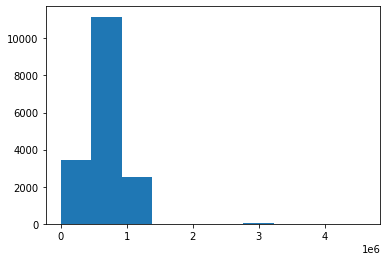

In [ ]:
plt.hist(cases_train['Confirmed'])

In [ ]:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="cmpt459milestone2")

# def imputeProvince(entry):
#     province = entry['province']
#     if province is None:
#         return "Unknown"

#     lat = str(entry['latitude'])
#     lng = str(entry['longitude'])
#     if pd.isna(province):
#         location = geolocator.reverse(lat + "," + lng)
#         return "Unknown" if location or location.raw['address'] is None else location.raw['address'].get('state')
#     else:
#         return province

# cases_train['province'] = cases_train.apply(lambda entry: imputeProvince(entry), axis=1)
# cases_test['province'] = cases_test.apply(lambda entry: imputeProvince(entry), axis=1)

In [ ]:
# Ensure that there are no null province data
# assert(cases_train['province'].isnull().sum() == 0)
# assert(cases_test['province'].isnull().sum() == 0)

# 1.1


In [ ]:
# selected_features = ["age", "sex", "country", "chronic_disease_binary"]

# Let's try everything that *might* have an impact first
selected_features = ["age", "sex", "province", "country", "chronic_disease_binary", "Confirmed", "Deaths", "Recovered", "Active", "Incident_Rate", "Case_Fatality_Ratio", "month", "weekday"]

In [ ]:
# (Just to get started) We want age, sex, country, chronic_disease_binary, Case_Fatality_Ratio
cases_train = cases_train[selected_features + ["outcome_group"]]
cases_test = cases_test[selected_features]

In [ ]:
cases_train

,age,sex,province,country,chronic_disease_binary,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,month,weekday,outcome_group
0,18,female,Bihar,India,False,265527,1576,262371,1580,212.762145,0.593537,5,0,hospitalized
1,27,female,Philippines,Philippines,False,747288,13297,603746,130245,681.949809,1.779368,4,2,nonhospitalized
2,46,male,Tamil Nadu,India,False,886673,12719,858075,15879,1139.078325,1.434463,5,5,hospitalized
3,21,female,Tamil Nadu,India,False,886673,12719,858075,15879,1139.078325,1.434463,5,6,hospitalized
4,27,male,Bihar,India,False,265527,1576,262371,1580,212.762145,0.593537,5,2,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17207,29,female,Tamil Nadu,India,False,886673,12719,858075,15879,1139.078325,1.434463,4,4,hospitalized
17208,47,female,Philippines,Philippines,False,747288,13297,603746,130245,681.949809,1.779368,4,3,nonhospitalized
17209,30,male,Bihar,India,False,265527,1576,262371,1580,212.762145,0.593537,5,1,hospitalized
17210,59,male,Tamil Nadu,India,False,886673,12719,858075,15879,1139.078325,1.434463,5,6,hospitalized


# 1.2


In [ ]:
# Possible categorical features that need to be mapped to numeric
categorical_features = ["sex", "province", "country", "chronic_disease_binary", "outcome_group"]

def mapToNumeric(df):
  for column in df:
    if column in selected_features + ['outcome_group']:
      if column in categorical_features:
        df[column] = pd.Categorical(df[column])
        df[column + '_code'] = df[column].cat.codes
      else:
        df[column + '_code'] = df[column]

mapToNumeric(cases_test)
mapToNumeric(cases_train)

<ipython-input-17-e6a10e15c149>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_code'] = df[column]
<ipython-input-17-e6a10e15c149>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.Categorical(df[column])
<ipython-input-17-e6a10e15c149>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
def displayCatCodes(df):
  print("Codes Index:[0..N]")
  for column in df:
      if column in selected_features:
          print(cases_train[column])

In [ ]:
 #displayCatCodes(cases_train)

In [ ]:
# displayCatCodes(cases_test)

In [ ]:
test_codes = cases_test.filter(regex='_code')
test_codes

,age_code,sex_code,province_code,country_code,chronic_disease_binary_code,Confirmed_code,Deaths_code,Recovered_code,Active_code,Incident_Rate_code,Case_Fatality_Ratio_code,month_code,weekday_code
0,59,0,32,16,0,747288,13297,603746,130245,681.949809,1.779368,3,1
1,79,1,42,11,0,886673,12719,858075,15879,1139.078325,1.434463,5,6
2,44,0,42,11,0,886673,12719,858075,15879,1139.078325,1.434463,5,1
3,36,1,42,11,0,886673,12719,858075,15879,1139.078325,1.434463,4,3
4,52,1,4,11,0,265527,1576,262371,1580,212.762145,0.593537,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,66,1,24,11,0,997004,12567,956170,28267,1475.672533,1.260476,4,3
4300,66,1,32,16,0,747288,13297,603746,130245,681.949809,1.779368,3,1
4301,53,0,42,11,0,886673,12719,858075,15879,1139.078325,1.434463,5,1
4302,25,1,42,11,0,886673,12719,858075,15879,1139.078325,1.434463,5,2


In [ ]:
train_codes = cases_train.filter(regex='_code')
train_codes

,age_code,sex_code,province_code,country_code,chronic_disease_binary_code,Confirmed_code,Deaths_code,Recovered_code,Active_code,Incident_Rate_code,Case_Fatality_Ratio_code,month_code,weekday_code,outcome_group_code
0,18,0,6,21,0,265527,1576,262371,1580,212.762145,0.593537,5,0,1
1,27,0,48,27,0,747288,13297,603746,130245,681.949809,1.779368,4,2,2
2,46,1,62,21,0,886673,12719,858075,15879,1139.078325,1.434463,5,5,1
3,21,0,62,21,0,886673,12719,858075,15879,1139.078325,1.434463,5,6,1
4,27,1,6,21,0,265527,1576,262371,1580,212.762145,0.593537,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17207,29,0,62,21,0,886673,12719,858075,15879,1139.078325,1.434463,4,4,1
17208,47,0,48,27,0,747288,13297,603746,130245,681.949809,1.779368,4,3,2
17209,30,1,6,21,0,265527,1576,262371,1580,212.762145,0.593537,5,1,1
17210,59,1,62,21,0,886673,12719,858075,15879,1139.078325,1.434463,5,6,1


# 1.3


In [ ]:
# for feature in selected_features + ["outcome_group"]:
#   print(train_codes[feature+"_code"].value_counts(), end="\n\n")

In [ ]:
# The outcome groups should be stratified
# Let's do a disproportional stratified random sample.
# So, even though only 997/17212 are outcome "0" we select (with repetition)
# the same amount of this group as any other outcome group.
# train_codes_strat = train_codes.groupby("outcome_group_code", group_keys=False).apply(lambda x: x.sample(15000, replace=True))

In [ ]:
# num_maj = train_codes[train_codes['outcome_group_code'] == 1].shape[0]


# train_codes_strat = pd.concat([
#     train_codes[train_codes['outcome_group_code'] == 1],  # we don't want to sample our majority
#     train_codes[train_codes['outcome_group_code'] == 2].sample(num_maj, replace=True),  # number of outcome 2
#     train_codes[train_codes['outcome_group_code'] == 0].sample(num_maj, replace=True)  # number of outcome 1
# ])

# train_codes_strat

In [ ]:
# We have 13241 of each outcome type (with replacement for 0,2)
# train_codes_strat["outcome_group_code"].value_counts()

# 1.4


In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold

## Testing with k-fold cross validation

In [ ]:
y_col = "outcome_group_code"
y = train_codes[y_col]
X = train_codes[train_codes.columns.drop(y_col)]

In [ ]:
# Not useful
# selector = VarianceThreshold()
# X2 = selector.fit_transform(X)

In [ ]:
def get_scores(model, params=None, n_iter=20, data=X):
  """
  Get the 3 scores we need for each model. This takes care of stratified samples.
  This also does 10-fold validation. If a grid is provided, then return the first
  found optimal parameters for this model.
  """

  # This makes sure we have a propotional amount of each class in each k folds
  skf = StratifiedKFold(n_splits=10)

  _X = data.to_numpy()

  macro_f1 = []
  deceased_f1 = []
  accuracy = []
  for train_index, test_index in skf.split(_X, y):
    X_train, X_test = _X[train_index], _X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    ros = RandomOverSampler()  # get equal amounts of each outcome type
    X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

    if params:
      gcv = RandomizedSearchCV(model, params, scoring='f1_macro', n_iter=n_iter)
      gcv.fit(X_train_res, y_train_res)
      return gcv.best_estimator_

    model.fit(X_train_res, y_train_res)

    test_pred = model.predict(X_test)
    macro_f1.append(f1_score(y_test, test_pred, average='macro'))
    deceased_f1.append(f1_score(y_test, test_pred, average=None)[0])
    accuracy.append(model.score(X_test, y_test))

  print(f"Mean macro f1 (must be >= 70) {mean(macro_f1)}")
  print(f"Mean deceased f1 (must be >= 40) {mean(deceased_f1)}")
  print(f"Mean accuracy {mean(accuracy)}")

In [ ]:
# Let's cluster and add that as a feature
# Looks like k=8 is best
for k in range(2, 15):
  model = KMeans(n_clusters=k)
  clusters = model.fit_predict(X)
  X['cluster'] = clusters

  model = RandomForestClassifier(
    criterion='entropy', max_depth=7, max_features='sqrt', n_estimators=30, random_state=101
)
  print(f"With k={k} clusters...")
  get_scores(model, data=X)

With k=2 clusters...
Mean macro f1 (must be >= 70) 0.7760534522364054
Mean deceased f1 (must be >= 40) 0.5202091384188272
Mean accuracy 0.9246459834482964
With k=3 clusters...
Mean macro f1 (must be >= 70) 0.7751549617658139
Mean deceased f1 (must be >= 40) 0.5168603651914687
Mean accuracy 0.9242393781537219
With k=4 clusters...
Mean macro f1 (must be >= 70) 0.7750756957258584
Mean deceased f1 (must be >= 40) 0.5168051331990234
Mean accuracy 0.9246461184210082
With k=5 clusters...
Mean macro f1 (must be >= 70) 0.7729661052257948
Mean deceased f1 (must be >= 40) 0.5147736695433502
Mean accuracy 0.9231937782978725
With k=6 clusters...
Mean macro f1 (must be >= 70) 0.7738117430626171
Mean deceased f1 (must be >= 40) 0.5164193335541054
Mean accuracy 0.9234259988486826
With k=7 clusters...
Mean macro f1 (must be >= 70) 0.7778469400182214
Mean deceased f1 (must be >= 40) 0.5236930348062557
Mean accuracy 0.9250528249451166
With k=8 clusters...
Mean macro f1 (must be >= 70) 0.7771630581527356


In [ ]:
# k=8 determined from above
# This ends up not being very useful though
model = KMeans(n_clusters=8)
clusters = model.fit_predict(X)
X['cluster'] = clusters

In [ ]:
# Get only the most useful features
useful_features = ['age_code', 'country_code', 'chronic_disease_binary_code', 'Deaths_code', 'Active_code', 'Case_Fatality_Ratio_code', 'month_code']
X1 = X[useful_features]

In [ ]:
model = GradientBoostingClassifier(n_estimators=100)
get_scores(model)

Mean macro f1 (must be >= 70) 0.7675780761694164
Mean deceased f1 (must be >= 40) 0.49456890849468255
Mean accuracy 0.9146527388325264


In [ ]:
model = AdaBoostClassifier()
get_scores(model)

Mean macro f1 (must be >= 70) 0.6696394306497897
Mean deceased f1 (must be >= 40) 0.3624212980840422
Mean accuracy 0.8397098829044237


In [ ]:
# Perceptron (45 - 0 - 84) sucks!
# model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4,3), activation='logistic', max_iter=5000)
# get_scores(model)

In [ ]:
model = GaussianNB()
get_scores(model)

Mean macro f1 (must be >= 70) 0.65073757903693
Mean deceased f1 (must be >= 40) 0.12299908354344176
Mean accuracy 0.9183710683292606


### Model 1 (random forest)

In [ ]:
params = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [2, 8, 21, 100, None],
  'max_features': ['sqrt', 2, 5, None],
}
model = RandomForestClassifier()
get_scores(model, data=X1, params=params, n_iter=5)

RandomForestClassifier(max_depth=100, max_features='sqrt')

In [ ]:
randomF = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=20, max_features=4)
)
get_scores(randomF, data=X1)

Mean macro f1 (must be >= 70) 0.7603365986202468
Mean deceased f1 (must be >= 40) 0.4726990501630909
Mean accuracy 0.9138964529846177


### Model 2 (Extra Trees)

In [ ]:
params = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [2, 8, 21, 100, None],
  'max_features': ['sqrt', 2, 5, None],
}
model = ExtraTreesClassifier()
get_scores(model, data=X1, params=params, n_iter=5)

ExtraTreesClassifier(criterion='entropy', max_depth=100, max_features=None)

In [ ]:
exTrees = make_pipeline(
    MinMaxScaler(),
    ExtraTreesClassifier(criterion='entropy', max_depth=7, max_features='sqrt')
)
get_scores(exTrees, data=X1)

Mean macro f1 (must be >= 70) 0.7800497565786617
Mean deceased f1 (must be >= 40) 0.49767391971984765
Mean accuracy 0.933651160326661


### Model 3 (adaboost)

In [ ]:
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]
}
model =  AdaBoostClassifier()
get_scores(model, params=params, n_iter=5)

AdaBoostClassifier(learning_rate=0.5)

In [ ]:
adaBoost = AdaBoostClassifier(learning_rate=0.1)
get_scores(adaBoost, data=X1)

Mean macro f1 (must be >= 70) 0.7421628930688671
Mean deceased f1 (must be >= 40) 0.45853084109867853
Mean accuracy 0.9093667687735231


### Model 4 (a vote of all three)

In [ ]:
voter = VotingClassifier(
  [
    ('rf', randomF),
    ('ext', exTrees),
    ('ada', adaBoost),
  ],
  voting="soft"
)
get_scores(voter)

Mean macro f1 (must be >= 70) 0.7842671495594254
Mean deceased f1 (must be >= 40) 0.5185533638598934
Mean accuracy 0.9323728675155101


# 1.5


In [ ]:
# Randomly sample 80:20 train/validation data sets.
X_train, X_validate, y_train, y_validate = train_test_split(
    X1,
    y,
    test_size=0.2,
)

In [ ]:
from sklearn.model_selection import validation_curve
# Plots the training and validation scores to analyze the influence of a hyperparameter on selected model.
# model, data, param_name, param_range, stratified kfolds
def plot_validation_curve(model, X, y, p_name, p_range, skfs):
  train_score, test_score = validation_curve(model, X, y,
                                       param_name = p_name,
                                       param_range = p_range,
                                       cv = skfs, 
                                       scoring = "f1_macro")
  
  # Calculating mean and standard deviation of training score
  mean_train_score = np.mean(train_score, axis = 1)
  # If necessary show the training score standard deviation
  std_train_score = np.std(train_score, axis = 1)
  
  # Calculating mean and standard deviation of testing score
  mean_test_score = np.mean(test_score, axis = 1)
  # If necessary show the test score standard deviation
  std_test_score = np.std(test_score, axis = 1)

  # Plot mean k1 scores for training and testing scores
  plt.plot(p_range, mean_train_score,
      label = "Training Score", color = 'b')
  plt.plot(p_range, mean_test_score,
    label = "Cross Validation Score", color = 'g')
  
  # Creating the plot
  plt.title(f"Validation Curve for {model.__class__.__name__}")
  plt.xlabel(p_name)
  plt.ylabel("F1 Score")
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.show()


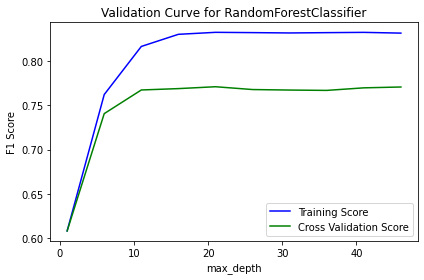

In [ ]:
# Increasing the max depth in a random forest will result in overfitting
parameter_range = np.arange(1, 50, 5)
plot_validation_curve(RandomForestClassifier(), X1, y, 'max_depth', parameter_range, 5)

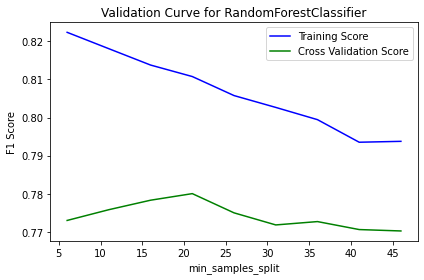

In [ ]:
# Increasing the min samples split in a random forest will result in underfitting
parameter_range = np.arange(1, 50, 5)
plot_validation_curve(RandomForestClassifier(), X1, y, 'min_samples_split', parameter_range, 5)

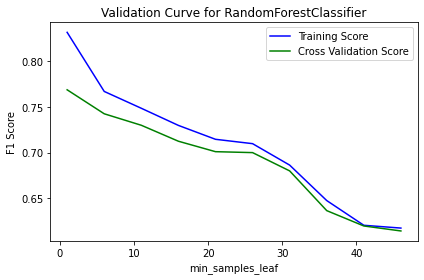

In [ ]:
# Increasing the min samples leaf in a random forest will result in underfitting
parameter_range = np.arange(1, 50, 5)
plot_validation_curve(RandomForestClassifier(), X1, y, 'min_samples_leaf', parameter_range, 5)

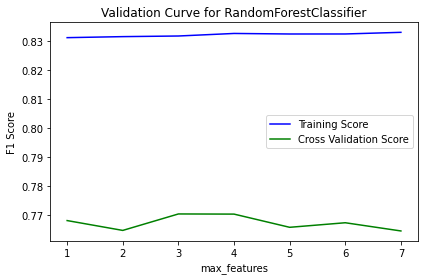

In [ ]:
# Increasing the max features in a random forest will result in underfitting
parameter_range = np.arange(1, 8, 1)
plot_validation_curve(RandomForestClassifier(), X1, y, 'max_features', parameter_range, 5)

In [ ]:
# Check with get_scores that max_depth 20 results in a worse performance than max_depth 8.
model = RandomForestClassifier(max_depth=20)
get_scores(model, data=X1)

Mean macro f1 (must be >= 70) 0.7487942055711534
Mean deceased f1 (must be >= 40) 0.4415001902324428
Mean accuracy 0.9057047903840042


In [ ]:
# Check with get_scores that max_depth 8 results in a better performance than max_depth 20.
model = RandomForestClassifier(max_depth=8)
get_scores(model, data=X1)

Mean macro f1 (must be >= 70) 0.7824625038470965
Mean deceased f1 (must be >= 40) 0.520674565035607
Mean accuracy 0.9268537320967134


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


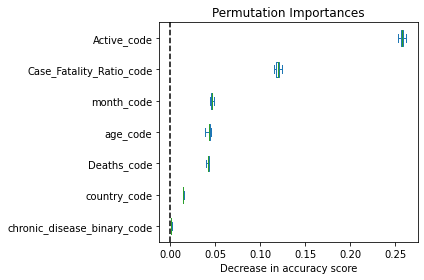

In [ ]:
#randomF.set_params(classifier__min_samples_leaf=20).fit(X1, y) 
from sklearn.inspection import permutation_importance

result = permutation_importance(
    randomF, X1, y, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X1.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


In [ ]:
# Hence for the selected model the Most Important Features will be number of active cases in the area (province/country) 
# followed by fatality ratio() which can be seen as a measure of how deadly a variant pertaining to this area is
# Month is also a major factor because of how much it spreads during a time period
# Age as expected (More age means chances are higher)
# It is notable to mention that country doesnt have much impact because many countries may have the same variant hence this will not effect much

Similarly checking for the other model : ExtraTrees

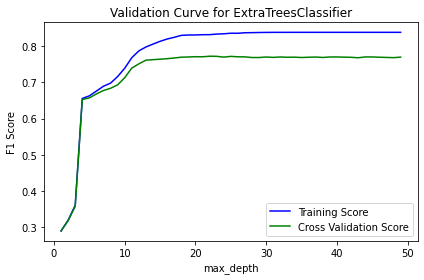

In [ ]:
# Increment in depth results in overfitting
parameter_range = np.arange(1, 50, 1)
plot_validation_curve(ExtraTreesClassifier(), X1, y, 'max_depth', parameter_range, 5)

In [ ]:
# Judging from graph depth of 8 performs better than depth >= 15
model = ExtraTreesClassifier(max_depth=8)
get_scores(model, data=X1)

Mean macro f1 (must be >= 70) 0.7861099291071509
Mean deceased f1 (must be >= 40) 0.5196602985056934
Mean accuracy 0.933418703573605


In [ ]:
# Hence increasing this param will result in overfitting
model = ExtraTreesClassifier(max_depth=15)
get_scores(model, data=X1)

Mean macro f1 (must be >= 70) 0.7764747651098738
Mean deceased f1 (must be >= 40) 0.5046562038264312
Mean accuracy 0.9251684965592082


Now finally checking for AdaBoost

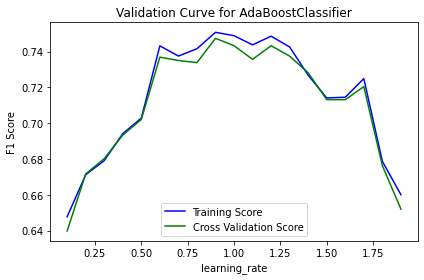

In [ ]:
parameter_range = np.arange(0.1, 2, 0.1)
plot_validation_curve(AdaBoostClassifier(), X1, y, 'learning_rate', parameter_range, 5)

In [ ]:
# We can clearly see that the learning rate can inversely effect the score after reaching a max value
#hence increasing it will create overfitting
model1 = AdaBoostClassifier(learning_rate=0.8)
get_scores(model1, data=X1)
model2 = AdaBoostClassifier(learning_rate=1.5)
get_scores(model2, data=X1)

Mean macro f1 (must be >= 70) 0.6957651799088824
Mean deceased f1 (must be >= 40) 0.3929713590616855
Mean accuracy 0.8645714515167896
Mean macro f1 (must be >= 70) 0.6593271587941383
Mean deceased f1 (must be >= 40) 0.33488153066169546
Mean accuracy 0.8219809809951674


# 1.6


In [ ]:
from sklearn.model_selection import learning_curve


In [ ]:
# Plots the learning curve of a model for its learning ability, scalability, and performance on incremental sized datasets.
def plot_learning_curve(model_name, model, X, y, skfs, axes, train_sizes=np.linspace(0.1, 1.0, 5), ylim=(0.7,1.0)):
  axes[0].set_title(f"Learning Curve for {model_name}")
  # axes[0].set_ylim(*ylim)
  axes[0].set_xlabel("Training examples")
  axes[0].set_ylabel("Score")
  
  train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X, y, cv = skfs, scoring = "f1_macro", return_times=True)
  mean_train_score = np.mean(train_scores, axis=1)
  mean_test_score = np.mean(test_scores, axis=1)
  mean_fit_times = np.mean(fit_times, axis=1)
  
  # Plot learning performance of model
  axes[0].grid()
  axes[0].plot(
        train_sizes, mean_train_score, "o-", color="b", label="Training score"
    )
  axes[0].plot(
        train_sizes, mean_test_score, "o-", color="g", label="Cross-validation score"
    )
  axes[0].legend(loc="best")

  # Plot scalibility of model
  # Plot n_samples vs fit_times
  axes[1].grid()
  axes[1].plot(train_sizes, mean_fit_times, "o-")
  axes[1].set_xlabel("Training examples")
  axes[1].set_ylabel("fit_times")
  axes[1].set_title("Scalability of the model")

  # Plot fit_time vs score
  fit_time_argsort = mean_fit_times.argsort()
  fit_time_sorted = mean_fit_times[fit_time_argsort]
  mean_test_scores_sorted = mean_test_score[fit_time_argsort]
  axes[2].grid()
  axes[2].plot(fit_time_sorted, mean_test_scores_sorted, "o-")

  axes[2].set_xlabel("fit_times")
  axes[2].set_ylabel("Score")
  axes[2].set_title("Performance of the model")

  
  return plt

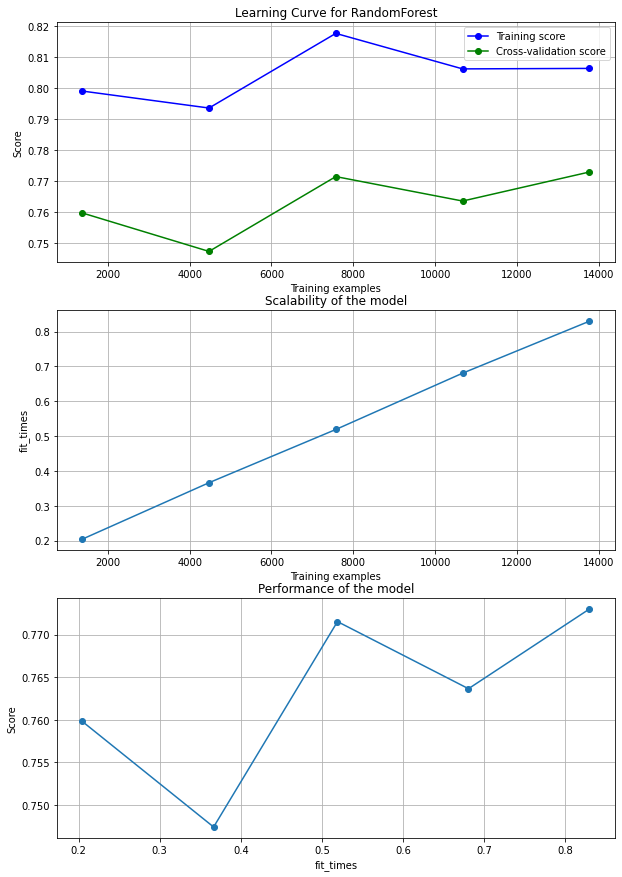

In [ ]:
# Plots the learning curve of tuned RandomForest for its learning ability, scalability, and performance on incremental sized datasets.
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plot_learning_curve("RandomForest", randomF, X1, y, 5, axes)
plt.show()

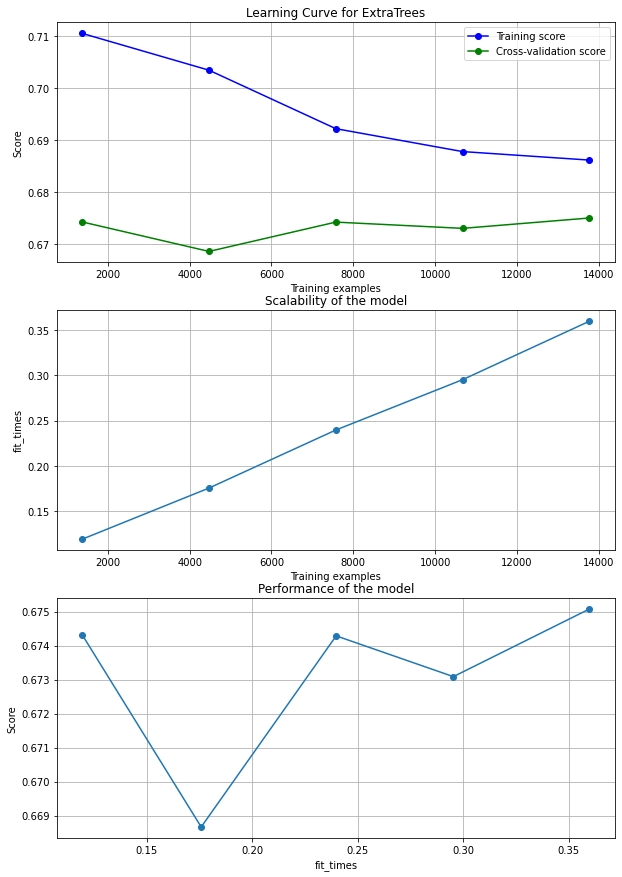

In [ ]:
# Plots the learning curve of tuned ExtraTrees for its learning ability, scalability, and performance on incremental sized datasets.
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plot_learning_curve("ExtraTrees", exTrees, X1, y, 5, axes)
plt.show()

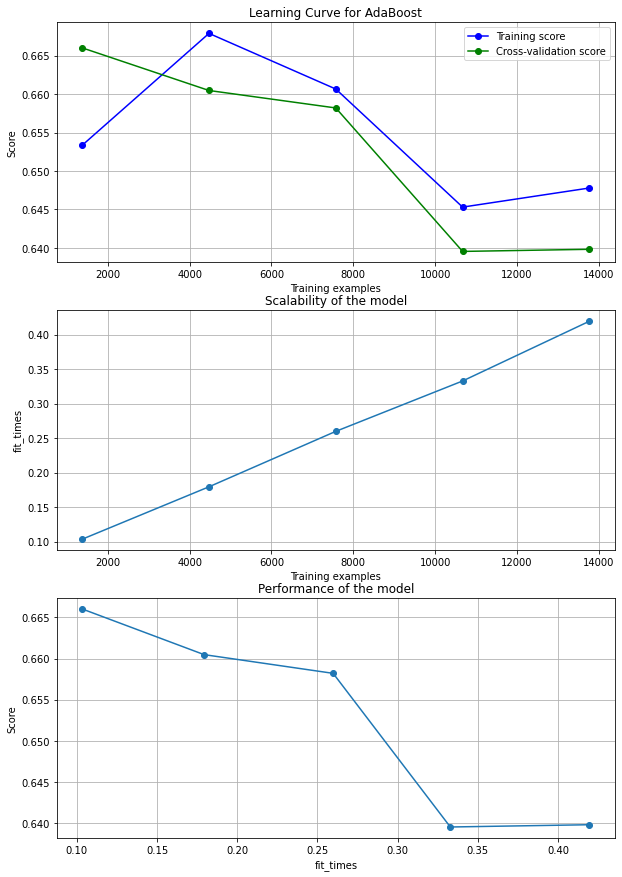

In [ ]:
# Plots the learning curve of tuned AdaBoost for its learning ability, scalability, and performance on incremental sized datasets.
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plot_learning_curve("AdaBoost", adaBoost, X1, y, 5, axes)
plt.show()

# 1.7



Relative performance for top 10 percentile and macro F1 > 80 & F1 > 40

In [ ]:
import csv

In [ ]:
X_test = test_codes[useful_features].to_numpy()

In [ ]:
y_preds_rf = randomF.predict(X_test)
y_preds_xt = exTrees.predict(X_test)
y_preds_ada = adaBoost.predict(X_test)

In [ ]:
def create_submission_file(y_preds, file_name):
  with open(file_name, 'w') as csvfile:
    wr = csv.writer(csvfile, quoting=csv.QUOTE_ALL)
    wr.writerow(["Id", "Prediction"])
    for i, pred in enumerate(y_preds):
      wr.writerow([str(i), str(pred)])

create_submission_file(y_preds_rf, 'submission_rf.csv')  # this is our best model
create_submission_file(y_preds_xt, 'submission_xt.csv')
create_submission_file(y_preds_ada, 'submission_ada.csv')